In [2]:
import pandas
import numpy as np

In [28]:
dataRaw = pandas.read_csv('~/Data/Insight/conversion_data.csv')

In [37]:
data = dataRaw

# Check balance of labels
print data.groupby(['converted']).size()

# Randomly sample evenly from converted and non-converted users
data = pandas.concat([data.iloc[data['converted'].values==1].sample(n=2000), 
                      data.iloc[data['converted'].values==0].sample(n=2000)])

# One hot encode country and source
countries = pandas.get_dummies(data['country'])
sources = pandas.get_dummies(data['source'])

for cname in list(sources):
    data[cname]=sources[cname]
for cname in list(countries):
    data[cname]=countries[cname]
    
# Split into train and test sets
nposts = len(data)
test = ((np.arange(nposts) % 10) == 0) | ((np.arange(nposts) % 10) == 3)
train = np.logical_not(test)
ntrain = len(np.where(train)[0])

features = list(data)

y = data['converted'].values
y_train = y_model[train]
y_test = y_model[test]

data = data.drop(['converted','country','source'],axis=1)
data_train = data.iloc[train,:]
data_test = data.iloc[test,:]

data_train

converted
0    306000
1     10200
dtype: int64


,age,new_user,total_pages_visited,Ads,Direct,Seo,China,Germany,UK,US
231457,31,0,10,1,0,0,0,0,0,1
250290,32,0,16,0,1,0,0,0,0,1
35512,33,1,24,0,1,0,0,1,0,0
2259,29,1,8,0,1,0,0,0,0,1
170810,20,0,18,1,0,0,0,0,1,0
310350,27,0,8,0,1,0,0,0,0,1
241178,24,1,12,0,0,1,0,1,0,0
271601,27,0,18,1,0,0,0,1,0,0
60362,17,1,13,0,0,1,0,0,1,0
106738,24,0,13,1,0,0,0,0,1,0


288.75


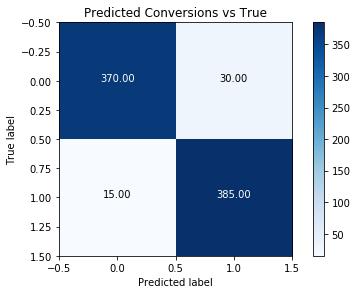

Accuracy: 0.96104   Recall: 0.92500   F1 score: 0.47134 


In [38]:
# Run regression

# Test if certain correlations are consistent and can be used as predictors for conversion rate
    
from sklearn import linear_model, datasets
from sklearn.metrics import mean_squared_error as MSE, r2_score as R2S, confusion_matrix
import matplotlib.pyplot as plt
import itertools

regr = linear_model.LogisticRegression()
regr.fit(data_train, y_train)

y_pred = regr.predict(data_test)
cm = confusion_matrix(y_test,y_pred)

if True:
    plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)
    plt.title('Predicted Conversions vs True')
    plt.colorbar()

    fmt = '.2f' if True else 'd'
    thresh = cm.max() * .75
    print thresh
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color=("white" if (cm[i, j] > thresh) else "black"))

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.show()
    
accuracy = float(cm[0,0])/(cm[0,0]+cm[1,0])
recall = float(cm[0,0])/(cm[0,0]+cm[0,1])
print "Accuracy: %.5f   Recall: %.5f   F1 score: %.5f "%(accuracy,
                                                    recall,
                                                    accuracy*recall/(accuracy+recall))